In [1]:
#python -m notebook =used to oen jupyter from vscode in browser


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [3]:
#Diabetes Data collection
diabetes_dataset=pd.read_csv('diabetes.csv') 

#Data Analysis
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
#Data visualization

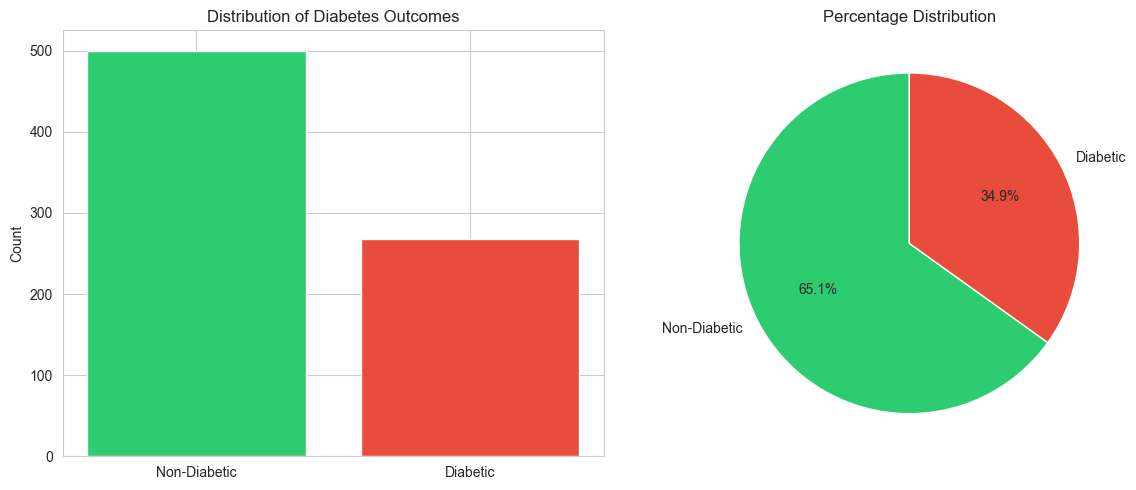

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

outcome_counts = diabetes_dataset['Outcome'].value_counts()

axes[0].bar(
    ['Non-Diabetic','Diabetic'],
    outcome_counts.values,
    color=['#2ecc71', '#e74c3c']
)
axes[0].set_title('Distribution of Diabetes Outcomes')
axes[0].set_ylabel('Count')

axes[1].pie(
    outcome_counts.values,
    labels=['Non-Diabetic','Diabetic'],
    autopct='%1.1f%%',
    colors=['#2ecc71','#e74c3c'],
    startangle=90
)
axes[1].set_title('Percentage Distribution')

plt.tight_layout()
plt.show()


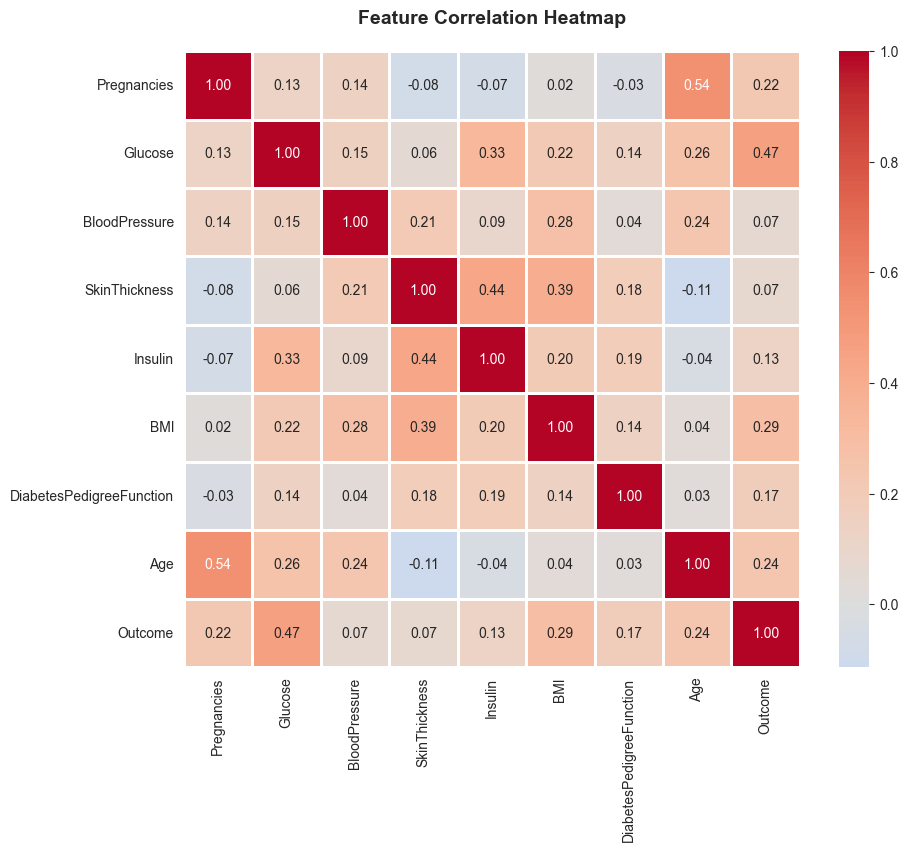

In [10]:
plt.figure(figsize=(10,8))
correlation=diabetes_dataset.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',center=0,square=True,linewidth=1,fmt='.2f')
plt.title('Feature Correlation Heatmap',fontsize=14,pad=20,fontweight='bold')
plt.show()

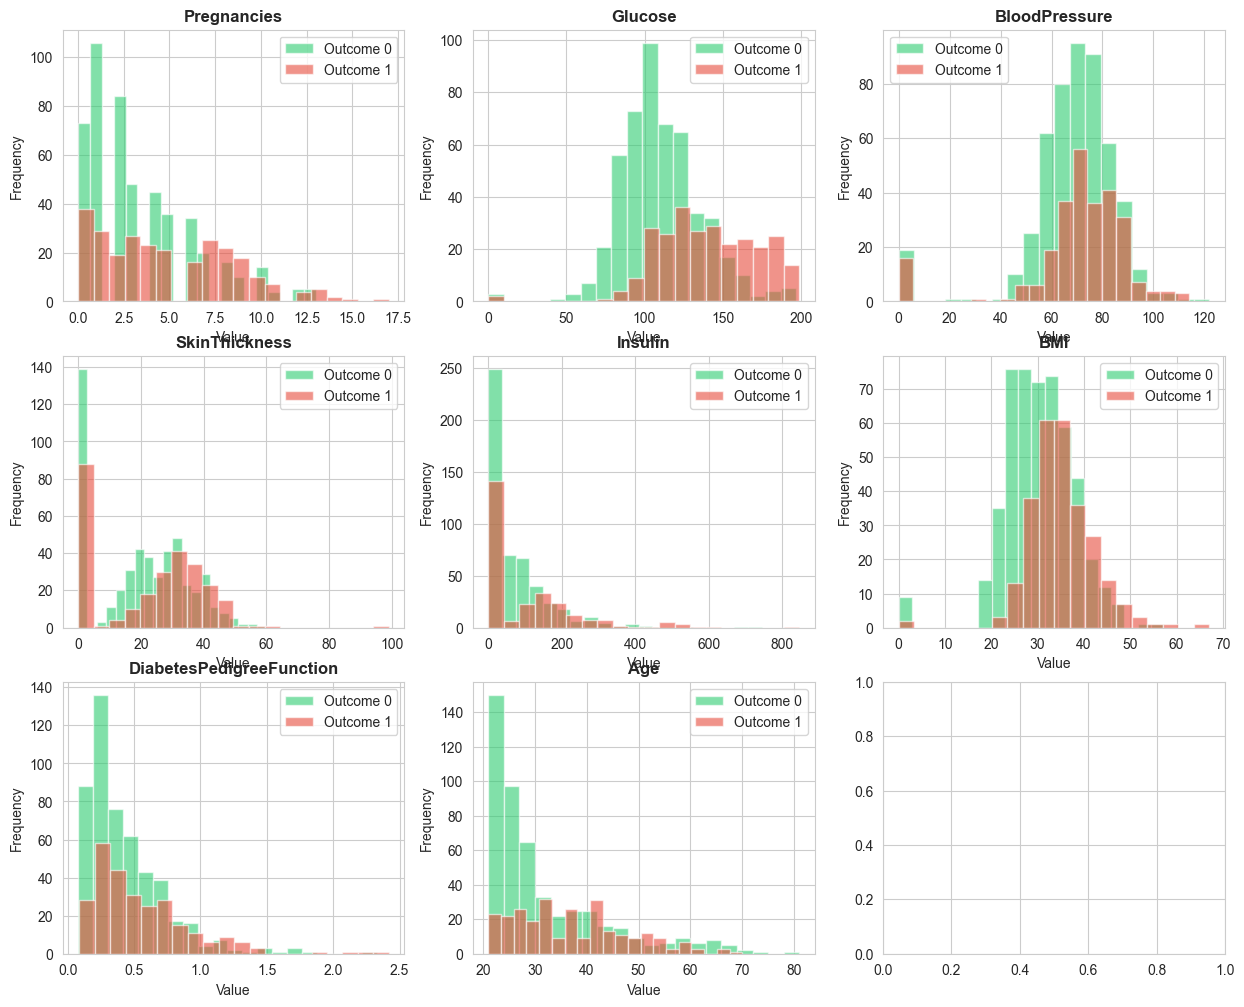

In [11]:
fig, axes=plt.subplots(3,3,figsize=(15,12))
features=diabetes_dataset.columns[:-1]
for idx,feature in enumerate(features):
    row,col=idx //3,idx%3
    for outcome in [0,1]:
        data=diabetes_dataset[diabetes_dataset['Outcome']==outcome][feature]
        axes[row,col].hist(data,alpha=0.6,bins=20,label=f'Outcome {outcome}',
                           color=['#2ecc71','#e74c3c'][outcome])
        axes[row,col].set_title(feature,fontweight='bold')
        axes[row,col].set_xlabel('Value')
        axes[row,col].set_ylabel('Frequency')
        axes[row,col].legend()
plt.show()
    

In [12]:
#data preprocessing

In [13]:
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
#data standardization
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [15]:
#spliting the data

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [17]:
#training the model

In [18]:
#1 SVM-support vector machine

In [19]:
classifier=svm.SVC(kernel='linear',probability=True)
classifier.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
#testing on train data MODEL EVALUATION
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
training_data_accuracy

0.7866449511400652

In [21]:
#testing on test data
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
test_data_accuracy

0.7727272727272727

In [22]:
precision=precision_score(y_test,x_test_prediction)
recall=recall_score(y_test,x_test_prediction)
f1=f1_score(y_test,x_test_prediction)
print(precision,recall,f1)

0.7567567567567568 0.5185185185185185 0.6153846153846154


In [23]:
cm_svm=confusion_matrix(y_test,x_test_prediction)
cm_svm

array([[91,  9],
       [26, 28]])

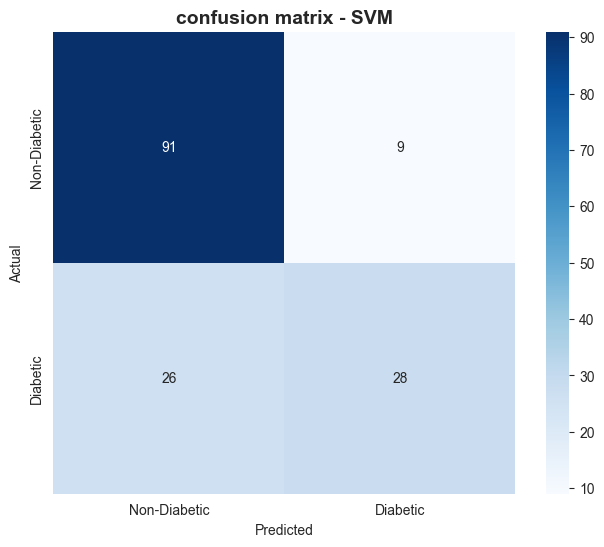

In [24]:



plt.figure(figsize=(8,6))
sns.heatmap(cm_svm,annot=True,fmt='d',cmap='Blues',square=True,
            xticklabels=['Non-Diabetic','Diabetic'],
            yticklabels=['Non-Diabetic','Diabetic'])
plt.title('confusion matrix - SVM',fontsize=14,fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
#traing another model
#2 random forest


In [26]:
rf_classfier=RandomForestClassifier(n_estimators=100,random_state=2)
rf_classfier.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
#evaluating the model


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_classifier.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
x_train_prediction_rf=rf_classifier.predict(x_train)


In [30]:
training_data_accuracy_rf=accuracy_score(x_train_prediction_rf,y_train)
training_data_accuracy_rf

1.0

In [31]:
x_test_prediction_rf=rf_classifier.predict(x_test)
test_data_accuracy_rf=accuracy_score(x_test_prediction_rf,y_test)

In [32]:
test_data_accuracy_rf

0.7597402597402597

In [33]:
precision_rf=precision_score(y_test,x_test_prediction_rf)

In [34]:
recall_rf=recall_score(y_test,x_test_prediction_rf)

In [35]:
f1_rf=f1_score(y_test,x_test_prediction_rf)

In [36]:
print(precision_rf,recall_rf,f1_rf)

0.6976744186046512 0.5555555555555556 0.6185567010309279


In [37]:
cm_rf=confusion_matrix(y_test,x_test_prediction_rf)
print(cm_rf)

[[87 13]
 [24 30]]


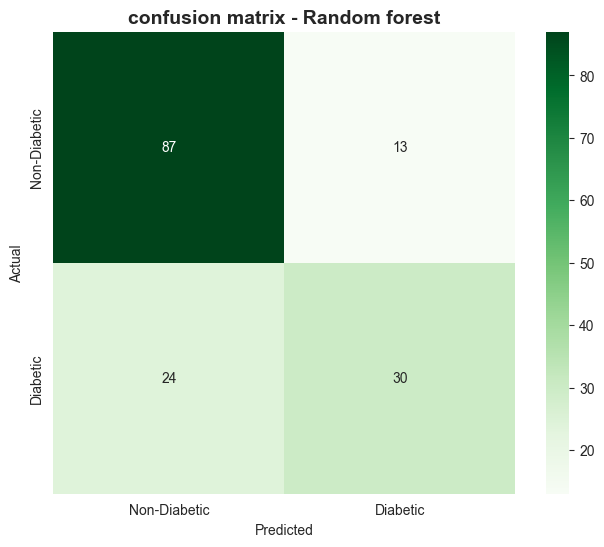

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='Greens',square=True,
            xticklabels=['Non-Diabetic','Diabetic'],
            yticklabels=['Non-Diabetic','Diabetic'])
plt.title('confusion matrix - Random forest',fontsize=14,fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
#which model is better

In [40]:
print('SVM',test_data_accuracy)
print('Random Forest',test_data_accuracy_rf)

SVM 0.7727272727272727
Random Forest 0.7597402597402597


In [41]:
#SVM is best
#saving the model
joblib.dump(classifier,'diabetes_model.pkl')

['diabetes_model.pkl']

In [42]:
input_data=(5,166,72,19,175,25.8,0.587,51)
input_num_array=np.asarray(input_data)
reshape=input_num_array.reshape(1,-1)
std_data=scaler.transform(reshape)
prediction=classifier.predict(std_data)

In [43]:
prediction

array([1])

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Split features and target
X = diabetes_dataset.drop("Outcome", axis=1)
y = diabetes_dataset["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train model
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_classifier.fit(X_train_scaled, y_train)

# SAVE MODEL FILES (THIS IS WHAT YOUR APP NEEDS)
joblib.dump(rf_classifier, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model files saved successfully ✅")


Model files saved successfully ✅


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset
diabetes_dataset = pd.read_csv("diabetes.csv")

# Features and target
X = diabetes_dataset.drop("Outcome", axis=1)
y = diabetes_dataset["Outcome"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train model
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_classifier.fit(X_train_scaled, y_train)

# Save model files
joblib.dump(rf_classifier, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model files created successfully ✅")


Model files created successfully ✅


In [46]:
import os
print(os.getcwd())


C:\web_dev\Projects\DiabeticPrediction.py


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

print("Saving files in:", os.getcwd())

# Load dataset
diabetes_dataset = pd.read_csv("diabetes.csv")

X = diabetes_dataset.drop("Outcome", axis=1)
y = diabetes_dataset["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model files saved successfully")


Saving files in: C:\web_dev\Projects\DiabeticPrediction.py
✅ Model files saved successfully


In [48]:
import joblib

model = joblib.load("diabetes_model.pkl")
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [49]:
import joblib

model = joblib.load("diabetes_model.pkl")
scaler = joblib.load("scaler.pkl")


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("diabetes.csv")

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [51]:
X_test_scaled = scaler.transform(X_test)


In [52]:
y_pred = model.predict(X_test_scaled)


In [53]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


Accuracy : 0.7207792207792207
Precision: 0.6071428571428571
Recall   : 0.6181818181818182
F1-score : 0.6126126126126126


In [54]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


Accuracy : 0.7207792207792207
Precision: 0.6071428571428571
Recall   : 0.6181818181818182
F1-score : 0.6126126126126126
